<a href="https://colab.research.google.com/github/man1-n/Data-Science-and-Business-Analytics-The-Sparks-Foundation/blob/Manohar-N/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manohar N

##Task 1: Prediction using Supervised ML
##Problem statement: Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#read the dataset
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
df.shape #Displays dimention of dataframe

(25, 2)

In [4]:
df.head() #viewing first 5 lines

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


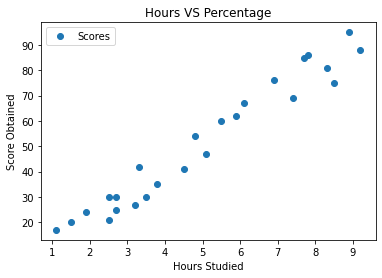

In [6]:
#plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.show()

In [8]:
#data is divided into attributes and labels
x = df.iloc[:, :-1].values #independent variable
y = df.iloc[:,-1].values #dependent variable

In [9]:
#split the data into training and testing sets using Scikit-Learn's 
#built-in train_test_split() method
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=0)

**train** **algorithm**

In [10]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training Complete")

Training Complete


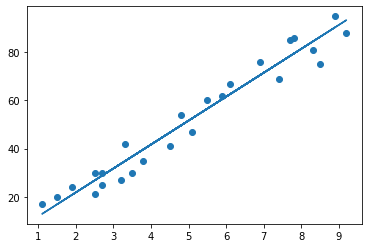

In [11]:
#plot regression line
line = regressor.coef_*x+regressor.intercept_

#plot test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# **predict**

In [12]:
print(x_test) #testdata in hours
y_pred = regressor.predict(x_test) #predict scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [13]:
dataf = pd.DataFrame({'Actual': y_test, 'Predicted_Score': y_pred})
dataf

,Actual,Predicted_Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [14]:
#Testing the model to show percentage of student if he/she studies for 9.25 hrs/day
hours = 9.25
pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No. of hours = 9.25
Predicted Score = 93.89272889341652


We see that the model predicts the score of the student as 93.8 if he/she studies for 9.25 hrs/day.

# **Evalute**

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482
